In [11]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

['00', '01', '04', '05', '06', '08', '09', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '23', '24', '26', '28', '29', '30', '31', '33', '35', '37', '38', '41', '42', '43', '44', '45', '50', '51', '53', '54', '56', '59', '60', '62', '63', '65', '69', '70', '72', '74', '75', '76', '77', '79', '81', '82', '84', '85', '87', '88', '89', '90', '91', '94', '95', '97', '98']
Dataset CustomImageFolder
    Number of datapoints: 64000
    Root location: double_mnist/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
['03', '07', '10', '22', '27', '34', '39', '40', '48', '52', '58', '61', '64', '71', '93', '99']
tensor([18, 18, 85, 87, 62, 29, 16,  6, 95, 91, 30, 51, 43, 31,  6, 13, 56, 51,
        60, 29,  6,  0, 60, 29, 97, 33, 62, 45, 26,  1, 81, 12, 85,  1,

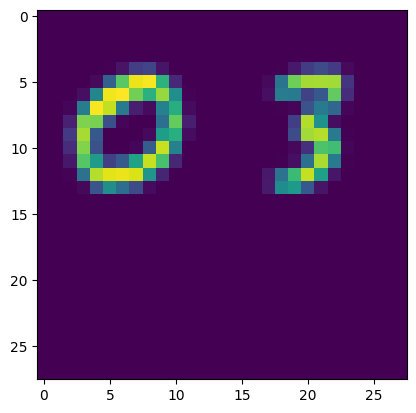

In [2]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale if not already
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data_path = 'double_mnist/train'
val_data_path = 'double_mnist/val'
test_data_path = 'double_mnist/test'
class CustomImageFolder(ImageFolder):
    def __init__(self, root, transform=None):
        super(CustomImageFolder, self).__init__(root, transform=transform)
    
    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            sample = self.transform(sample)

        # Assign labels based on folder name
        folder_name = os.path.basename(os.path.dirname(path))
        return sample, int(folder_name)  # Convert the folder name to an integer label
# Create ImageFolder datasets for training, validation, and test sets
train_dataset = CustomImageFolder(train_data_path, transform=transform)
val_dataset = CustomImageFolder(val_data_path, transform=transform)
test_dataset = CustomImageFolder(test_data_path, transform=transform)
print(train_dataset.classes)
class_to_label = {str(i).zfill(2): i for i in range(100)}
# Define batch sizes
batch_size = 64
print(train_dataset)
# Create DataLoader instances for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Number of classes
num_classes = 10

class_names = train_dataset.classes
class_names = val_dataset.classes

print(class_names)

for images, labels in train_loader:
    print(labels)
    break
for images, labels in val_loader:
    plt.imshow(images[0].permute(1, 2, 0))
    print(labels[0])
    print(labels)
    break




In [4]:
# class SimpleMLP(nn.Module):
#     def __init__(self, input_size, num_classes, hidden_size=128, dropout_rate=0.5):
#         super(SimpleMLP, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         x = x.view(x.size(0), -1)  # Flatten the input
#         x = self.fc1(x)
#         x = self.relu1(x)
#         x = self.fc2(x)
#         return x

# # Define the model
# input_size = 28 * 28  # Replace with the actual input size
# num_classes = 10  # Replace with the actual number of classes
# hidden_size = 128
# dropout_rate = 0.5

class SimpleMLP(nn.Module):
    def __init__(self, input_size, num_classes, hidden_layers, hidden_neurons, dropout_rate=0.5):
        super(SimpleMLP, self).__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.hidden_layers = hidden_layers
        self.hidden_neurons = hidden_neurons
        
        layers = []
        layers.append(nn.Linear(input_size, hidden_neurons[0]))
        layers.append(nn.ReLU())
        for i in range(1, hidden_layers):
            layers.append(nn.Linear(hidden_neurons[i-1], hidden_neurons[i]))
            layers.append(nn.ReLU())
        self.hidden = nn.Sequential(*layers)
        
        self.dropout = nn.Dropout(dropout_rate)
        self.fc_out = nn.Linear(hidden_neurons[-1], num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.hidden(x)
        x = self.dropout(x)
        x = self.fc_out(x)
        return x

# Example usage
input_size = 28 * 28
num_classes = 10
hidden_layers = 3
hidden_neurons = [256,256,256]  # Modify this list as needed
dropout_rate = 0.5


model = SimpleMLP(input_size, num_classes, hidden_layers, hidden_neurons, dropout_rate)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model1 = SimpleMLP(input_size, num_classes, hidden_layers, hidden_neurons, dropout_rate)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)





In [5]:
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    cnt = 0
    for images, labels in train_loader:
        labels1 = labels//10
        labels2 = labels%10
        optimizer1.zero_grad()
        optimizer.zero_grad()
        image = images.clone()
        image1 = images.clone()
        left_half = images[:, :, :, :images.shape[3] // 2]
        image[:, :, :, (image.shape[3] // 2):] = left_half
        right_half = images[:, :, :, images.shape[3] // 2 :]
        image1[:, :, :, :(image1.shape[3] // 2)] = right_half
        outputs = model(image)
        outputs1 = model1(image1)
        loss = criterion(outputs, labels1)
        loss1 = criterion1(outputs1,labels2)
        loss.backward()
        loss1.backward()
        optimizer.step()
        optimizer1.step()
        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        _, predicted1 = torch.max(outputs1.data, 1)
        total_train += 2*labels.size(0)
        for i in range(labels.size(0)):
            if(predicted[i] == labels[i]//10):
                correct_train += 1
            if(predicted1[i] == labels[i]%10):
                correct_train += 1
    train_accuracy = 100 * correct_train / total_train
    average_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {average_train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%')
    model.eval()
    model1.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in val_loader:
            labels1 = labels // 10
            labels2 = labels % 10
            image = images.clone()
            image1 = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            right_half = images[:, :, :, images.shape[3] // 2 :]
            image1[:, :, :, :(image1.shape[3] // 2)] = right_half
            outputs = model(image)
            outputs1 = model1(image1)
            loss = criterion(outputs, labels1)
            loss1 = criterion1(outputs1,labels2)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, predicted1 = torch.max(outputs1.data, 1)
            total_val += 2*labels.size(0)
            for i in range(labels.size(0)):
                if(predicted[i] == labels[i]//10):
                    correct_val += 1
                if(predicted1[i] == labels[i]%10):
                    correct_val += 1
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(val_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Validation Loss: {average_val_loss:.4f} - Validation Accuracy: {val_accuracy:.2f}%')
    model.eval()
    model1.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in test_loader:
            labels1 = labels // 10
            labels2 = labels % 10
            image = images.clone()
            image1 = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            right_half = images[:, :, :, images.shape[3] // 2 :]
            image1[:, :, :, :(image1.shape[3] // 2)] = right_half
            outputs = model(image)
            outputs1 = model1(image1)
            loss = criterion(outputs, labels1)
            loss1 = criterion1(outputs1,labels2)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, predicted1 = torch.max(outputs1.data, 1)
            total_val += 2*labels.size(0)
            for i in range(labels.size(0)):
                if(predicted[i] == labels[i]//10):
                    correct_val += 1
                if(predicted1[i] == labels[i]%10):
                    correct_val += 1
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(test_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Testing Loss: {average_val_loss:.4f} - Testing Accuracy: {val_accuracy:.2f}%')


Epoch 1/25 - Train Loss: 1.9690 - Train Accuracy: 29.12%
Epoch 1/25 - Validation Loss: 1.9367 - Validation Accuracy: 32.68%
Epoch 1/25 - Testing Loss: 1.9647 - Testing Accuracy: 22.71%
Epoch 2/25 - Train Loss: 1.7751 - Train Accuracy: 38.38%
Epoch 2/25 - Validation Loss: 1.7664 - Validation Accuracy: 38.00%
Epoch 2/25 - Testing Loss: 1.8324 - Testing Accuracy: 27.10%
Epoch 3/25 - Train Loss: 1.6701 - Train Accuracy: 43.74%
Epoch 3/25 - Validation Loss: 1.6841 - Validation Accuracy: 43.07%
Epoch 3/25 - Testing Loss: 1.7891 - Testing Accuracy: 31.87%
Epoch 4/25 - Train Loss: 1.5503 - Train Accuracy: 47.49%
Epoch 4/25 - Validation Loss: 1.4802 - Validation Accuracy: 48.10%
Epoch 4/25 - Testing Loss: 1.5961 - Testing Accuracy: 37.47%
Epoch 5/25 - Train Loss: 1.4497 - Train Accuracy: 51.95%
Epoch 5/25 - Validation Loss: 1.4572 - Validation Accuracy: 48.67%
Epoch 5/25 - Testing Loss: 1.5138 - Testing Accuracy: 40.95%
Epoch 6/25 - Train Loss: 1.3934 - Train Accuracy: 55.59%
Epoch 6/25 - Valid

In [10]:
learning_rates = [0.001]
hidden_layers = [1, 2,3]
hidden_neurons = [128,256]
for lrate in learning_rates:
    for j in hidden_layers:
        for k in hidden_neurons:
            print(lrate)
            input_size = 28 * 28
            kk = [k]*j
            model = SimpleMLP(input_size, num_classes=num_classes, hidden_layers = j, hidden_neurons = kk, dropout_rate = 0.5)
            model1 = SimpleMLP(input_size, num_classes=num_classes, hidden_layers = j, hidden_neurons = kk, dropout_rate = 0.5)
            criterion = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=lrate)
            criterion1 = nn.CrossEntropyLoss()
            optimizer1 = torch.optim.Adam(model1.parameters(), lr=lrate)
            num_epochs = 5
            for epoch in range(num_epochs):
                model.train()
                total_train_loss = 0
                correct_train = 0
                total_train = 0
                cnt = 0
                for images, labels in train_loader:
                    labels1 = labels//10
                    labels2 = labels%10
                    # class_names = train_dataset.classes
                    optimizer1.zero_grad()
                    optimizer.zero_grad()
                    image = images.clone()
                    image1 = images.clone()
                    left_half = images[:, :, :, :images.shape[3] // 2]
                    # print(left_half.shape)
                    image[:, :, :, (image.shape[3] // 2):] = left_half
                    right_half = images[:, :, :, images.shape[3] // 2 :]
                    image1[:, :, :, :(image1.shape[3] // 2)] = right_half
                    # print(images.shape)
                    outputs = model(image)
                    outputs1 = model1(image1)
                    loss = criterion(outputs, labels1)
                    loss1 = criterion1(outputs1,labels2)
                    loss.backward()
                    loss1.backward()
                    optimizer.step()
                    optimizer1.step()
                    total_train_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    _, predicted1 = torch.max(outputs1.data, 1)
                    total_train += 2*labels.size(0)
                    for i in range(labels.size(0)):
                        # cnt += 1
                        # if(cnt == 10):
                        #     print(predicted[i])
                        #     print(predicted1[i])
                        #     print(labels[i])
                        #     cnt=0
                        #     break
                        if(predicted[i] == labels[i]//10):
                            correct_train += 1
                        if(predicted1[i] == labels[i]%10):
                            correct_train += 1
                    # cnt += 1
                    # if(cnt == 10):
                    #     break
                train_accuracy = 100 * correct_train / total_train
                average_train_loss = total_train_loss / len(train_loader)
                print(f'Epoch {epoch+1}/{num_epochs} - Hidden layers: {j} - Hidden neurons: {kk} - Train Accuracy: {train_accuracy:.2f}%')
                model.eval()
                model1.eval()
                total_val_loss = 0
                correct_val = 0
                total_val = 0
                cnt = 0
                with torch.no_grad():
                    for images, labels in test_loader:
                        labels1 = labels // 10
                        labels2 = labels % 10
                        image = images.clone()
                        image1 = images.clone()
                        left_half = images[:, :, :, :images.shape[3] // 2]
                        image[:, :, :, (image.shape[3] // 2):] = left_half
                        right_half = images[:, :, :, images.shape[3] // 2 :]
                        image1[:, :, :, :(image1.shape[3] // 2)] = right_half
                        outputs = model(image)
                        outputs1 = model1(image1)
                        loss = criterion(outputs, labels1)
                        loss1 = criterion1(outputs1,labels2)
                        total_val_loss += loss.item()
                        _, predicted = torch.max(outputs.data, 1)
                        _, predicted1 = torch.max(outputs1.data, 1)
                        total_val += 2*labels.size(0)
                        for i in range(labels.size(0)):
                            if(predicted[i] == labels[i]//10):
                                correct_val += 1
                            if(predicted1[i] == labels[i]%10):
                                correct_val += 1
                val_accuracy = 100 * correct_val / total_val
                average_val_loss = total_val_loss / len(test_loader)
                print(f'Epoch {epoch + 1}/{num_epochs} - Testing Loss: {average_val_loss:.4f} - Testing Accuracy: {val_accuracy:.2f}%')


0.001
Epoch 1/5 - Hidden layers: 1 - Hidden neurons: [128] - Train Accuracy: 21.31%
Epoch 1/5 - Testing Loss: 2.1586 - Testing Accuracy: 14.15%
Epoch 2/5 - Hidden layers: 1 - Hidden neurons: [128] - Train Accuracy: 29.21%
Epoch 2/5 - Testing Loss: 2.1306 - Testing Accuracy: 18.86%
Epoch 3/5 - Hidden layers: 1 - Hidden neurons: [128] - Train Accuracy: 31.58%
Epoch 3/5 - Testing Loss: 2.0895 - Testing Accuracy: 20.61%
Epoch 4/5 - Hidden layers: 1 - Hidden neurons: [128] - Train Accuracy: 32.52%
Epoch 4/5 - Testing Loss: 2.0565 - Testing Accuracy: 23.17%
Epoch 5/5 - Hidden layers: 1 - Hidden neurons: [128] - Train Accuracy: 33.28%
Epoch 5/5 - Testing Loss: 2.0778 - Testing Accuracy: 19.66%
0.001
Epoch 1/5 - Hidden layers: 1 - Hidden neurons: [256] - Train Accuracy: 24.90%
Epoch 1/5 - Testing Loss: 2.0725 - Testing Accuracy: 17.09%
Epoch 2/5 - Hidden layers: 1 - Hidden neurons: [256] - Train Accuracy: 32.14%
Epoch 2/5 - Testing Loss: 2.0318 - Testing Accuracy: 23.66%
Epoch 3/5 - Hidden lay

# 5.1.3 (Testing on regular MNIST)

In [13]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
total_size = len(trainset)
train_size = int(0.8 * total_size)
validation_size = int(0.1 * total_size)
test_size = total_size - train_size - validation_size

# Split the dataset
gen = torch.Generator().manual_seed(42)
train_set, validation_set, test_set = random_split(trainset, [train_size, validation_size, test_size],generator=gen)

# Create data loaders for each set
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True,generator=gen)
validationloader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

input_size = 28 * 28
num_classes = 10
hidden_layers = 3
hidden_neurons = [256,256,256]
dropout_rate = 0.5


model = SimpleMLP(input_size, num_classes, hidden_layers, hidden_neurons, dropout_rate)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model1 = SimpleMLP(input_size, num_classes, hidden_layers, hidden_neurons, dropout_rate)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0
    cnt = 0
    for images, labels in train_loader:
        labels1 = labels//10
        labels2 = labels%10
        optimizer1.zero_grad()
        optimizer.zero_grad()
        image = images.clone()
        image1 = images.clone()
        left_half = images[:, :, :, :images.shape[3] // 2]
        image[:, :, :, (image.shape[3] // 2):] = left_half
        right_half = images[:, :, :, images.shape[3] // 2 :]
        image1[:, :, :, :(image1.shape[3] // 2)] = right_half
        outputs = model(image)
        outputs1 = model1(image1)
        loss = criterion(outputs, labels1)
        loss1 = criterion1(outputs1,labels2)
        loss.backward()
        loss1.backward()
        optimizer.step()
        optimizer1.step()
        total_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        _, predicted1 = torch.max(outputs1.data, 1)
        total_train += 2*labels.size(0)
        for i in range(labels.size(0)):
            if(predicted[i] == labels[i]//10):
                correct_train += 1
            if(predicted1[i] == labels[i]%10):
                correct_train += 1
    train_accuracy = 100 * correct_train / total_train
    average_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {average_train_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%')
    model.eval()
    model1.eval()
    total_val_loss = 0
    correct_val = 0
    total_val = 0
    cnt = 0
    with torch.no_grad():
        for images, labels in testloader:
            labels1 = labels // 10
            labels2 = labels % 10
            image = images.clone()
            image1 = images.clone()
            left_half = images[:, :, :, :images.shape[3] // 2]
            image[:, :, :, (image.shape[3] // 2):] = left_half
            right_half = images[:, :, :, images.shape[3] // 2 :]
            image1[:, :, :, :(image1.shape[3] // 2)] = right_half
            outputs = model(image)
            outputs1 = model1(image1)
            loss = criterion(outputs, labels1)
            loss1 = criterion1(outputs1,labels2)
            total_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            _, predicted1 = torch.max(outputs1.data, 1)
            total_val += 2*labels.size(0)
            for i in range(labels.size(0)):
                if(predicted[i] == labels[i]//10):
                    correct_val += 1
                if(predicted1[i] == labels[i]%10):
                    correct_val += 1
    val_accuracy = 100 * correct_val / total_val
    average_val_loss = total_val_loss / len(test_loader)
    print(f'Epoch {epoch + 1}/{num_epochs} - Testing Loss: {average_val_loss:.4f} - Testing Accuracy: {val_accuracy:.2f}%')





Epoch 1/10 - Train Loss: 1.9254 - Train Accuracy: 29.83%
Epoch 1/10 - Testing Loss: 1.8771 - Testing Accuracy: 12.67%
Epoch 2/10 - Train Loss: 1.5908 - Train Accuracy: 43.52%
Epoch 2/10 - Testing Loss: 3.8163 - Testing Accuracy: 7.15%
Epoch 3/10 - Train Loss: 1.3089 - Train Accuracy: 56.22%
Epoch 3/10 - Testing Loss: 4.8375 - Testing Accuracy: 6.52%
Epoch 4/10 - Train Loss: 1.1054 - Train Accuracy: 65.05%
Epoch 4/10 - Testing Loss: 4.9387 - Testing Accuracy: 6.93%
Epoch 5/10 - Train Loss: 0.9295 - Train Accuracy: 71.27%
Epoch 5/10 - Testing Loss: 4.9218 - Testing Accuracy: 7.92%
Epoch 6/10 - Train Loss: 0.8090 - Train Accuracy: 74.94%
Epoch 6/10 - Testing Loss: 5.6319 - Testing Accuracy: 6.92%
Epoch 7/10 - Train Loss: 0.7375 - Train Accuracy: 77.50%
Epoch 7/10 - Testing Loss: 6.1998 - Testing Accuracy: 7.36%
Epoch 8/10 - Train Loss: 0.6779 - Train Accuracy: 79.31%
Epoch 8/10 - Testing Loss: 6.8312 - Testing Accuracy: 7.67%
Epoch 9/10 - Train Loss: 0.6392 - Train Accuracy: 80.62%
Epoch 